In [1]:
import numpy as np
import os
import pandas as pd

In [2]:
#Selecionando o caminho dos dados# 
absolute_path = os.path.dirname("__file__")
relative_path = "dadosFacesAltaResolucao.txt"
full_path = os.path.join(absolute_path, relative_path)

In [3]:
df = pd.read_table(full_path, sep=' ')
df

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x4087,x4088,x4089,x4090,x4091,x4092,x4093,x4094,x4095,x4096
0,-32.119,0.016176,0,0,0,0,0,0,0,0.0,...,0.642940,0.71656,0.691410,0.610660,0.560630,0.564890,0.538110,0.384190,0.127670,0.008624
1,29.044,0.016176,0,0,0,0,0,0,0,0.0,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,-28.113,0.016176,0,0,0,0,0,0,0,0.0,...,0.781660,0.72143,0.651470,0.581620,0.559540,0.546550,0.455390,0.262640,0.095282,0.008640
3,59.263,0.016176,0,0,0,0,0,0,0,0.0,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,-42.010,0.016176,0,0,0,0,0,0,0,0.0,...,0.000000,0.00000,0.046094,0.142970,0.074249,0.034589,0.023499,0.000781,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693,-34.086,0.016176,0,0,0,0,0,0,0,0.0,...,0.045129,0.10725,0.369820,0.569290,0.661090,0.594930,0.257600,0.036734,0.015502,0.000797
694,-48.328,0.016176,0,0,0,0,0,0,0,0.0,...,0.000000,0.00000,0.003125,0.003125,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
695,69.475,0.016176,0,0,0,0,0,0,0,0.0,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
696,24.340,0.016176,0,0,0,0,0,0,0,0.0,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [4]:
import matplotlib.pyplot as plt

In [5]:
imagens = [0, 0, 0, 0, 0]
for i in range(5):
    line = df.iloc[i,1:]
    line = np.resize(line, (64, 64))
    line = np.flip(line, axis=0)
    imagens[i] = line
   

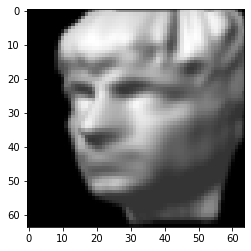

In [6]:
plt.imshow(imagens[0], cmap="gray")

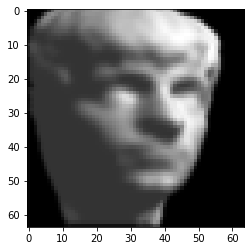

In [7]:
plt.imshow(imagens[1], cmap="gray")

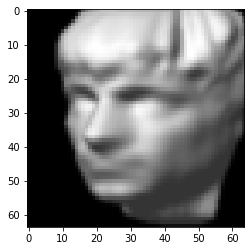

In [8]:
plt.imshow(imagens[2], cmap="gray")

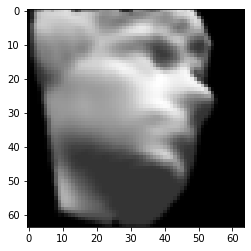

In [9]:
plt.imshow(imagens[3], cmap="gray")

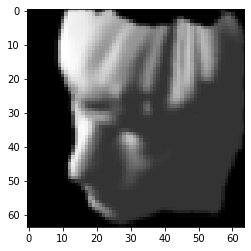

In [10]:
plt.imshow(imagens[4], cmap="gray")

São 697 observações e 4096 covariáveis. Cada covariável representa um pixel em escala de cinza. 

In [11]:
#Separando variavel independente e covariaveis# 
Y = df.iloc[:,0]
X = df.iloc[:,1:]

In [12]:
#Separando conjunto de treino e teste. Conjunto validacao saira do treino por validacao cruzada dado o numero pequeno de observacoes#
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2022)

In [13]:
#Ajustando modelo KNN k=5#
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [14]:
#Previsao com o grupo teste#
preds_k5 = knn.predict(X_test)
preds_k5

array([-59.8862  , -19.93324 ,  54.5622  , -16.295   ,  29.2294  ,
       -27.4206  , -23.2114  ,  -3.03718 ,  -2.10428 , -67.593   ,
       -58.3274  , -67.3354  ,  -9.91304 , -62.33    , -23.2114  ,
        41.6674  , -45.2198  , -49.462   , -19.1194  , -52.9056  ,
        41.7184  , -43.8928  , -41.24    , -55.6422  , -31.0442  ,
        -4.2464  , -67.7786  ,  46.6564  , -44.2662  , -69.0848  ,
        16.7371  , -42.9132  ,  16.391   ,  70.456   ,  66.8532  ,
       -20.9182  , -32.5426  ,  57.2602  ,  29.4068  ,  11.4232  ,
       -47.3154  ,  46.801   , -65.5816  ,  58.5912  , -21.2116  ,
       -23.2744  , -50.644   , -46.547   , -34.7992  , -63.7808  ,
       -16.5076  , -57.6072  , -52.1594  ,  57.9504  , -19.7442  ,
       -22.7444  ,  66.186   , -55.4302  ,  52.1252  ,  35.6274  ,
        48.7768  ,  43.5332  ,   4.45726 , -48.6702  ,  50.4094  ,
         9.3341  , -67.0196  ,  -2.10428 ,   1.14194 ,  -7.14282 ,
        39.7908  ,  61.184   ,  -1.618044,  33.9842  , -52.410

In [15]:
#Testando k de 1 a 30 com validacao cruzada em 4 grupos. Funcao risco dada pelo EQM"
from sklearn.model_selection import cross_val_score
from statistics import mean
scores = np.zeros(30)

for i in range(1, 30):
    knn = KNeighborsRegressor(n_neighbors=i)
    score = cross_val_score(knn, X_train, y_train, scoring='neg_mean_squared_error', cv=4)
    scores[i] = mean(score)*(-1)
    print(f'Score: {score} para k= {i}')

Score: [-18.36764838 -16.00937181 -17.26079092 -18.52544114] para k= 1
Score: [-12.14357345 -14.19534619 -13.17001181 -16.93778706] para k= 2
Score: [-12.70235468 -12.39189302 -10.93348383 -17.5417149 ] para k= 3
Score: [-10.42943641 -12.55482172 -12.94544017 -15.53761363] para k= 4
Score: [-11.5879766  -14.16741396 -13.07702293 -17.0573431 ] para k= 5
Score: [-12.49272424 -13.53268604 -13.98444691 -17.9511445 ] para k= 6
Score: [-14.83222424 -14.30436215 -14.18421389 -18.63828642] para k= 7
Score: [-14.20540379 -19.76198401 -16.5446883  -19.16663265] para k= 8
Score: [-16.07998423 -26.80121048 -19.30134569 -20.51110661] para k= 9
Score: [-17.50487568 -28.88241034 -22.3221592  -20.64893456] para k= 10
Score: [-25.10596163 -29.92100201 -25.53944365 -21.06818856] para k= 11
Score: [-30.75225314 -31.56769306 -26.29571783 -24.3702174 ] para k= 12
Score: [-31.88082322 -41.86462846 -27.94742207 -30.73285008] para k= 13
Score: [-34.98098088 -46.42320788 -32.63362359 -34.90310461] para k= 14
S

In [16]:
scores

array([  0.        ,  17.54081306,  14.11167963,  13.39236161,
        12.86682798,  13.97243915,  14.49025042,  15.48977167,
        17.41967719,  20.67341175,  22.33959494,  25.40864896,
        28.24647036,  33.10643096,  37.23522924,  45.43813849,
        53.9634348 ,  59.16903607,  64.63339981,  73.840571  ,
        79.67711366,  86.80419528,  92.43558745, 100.5014895 ,
       105.72336001, 112.53080022, 118.66712557, 126.8521134 ,
       136.02711224, 141.74515088])

In [17]:
min(scores[1:])

12.86682798068125

K = 4 tem o melhor risco estimado 

Text(0, 0.5, 'EQM')

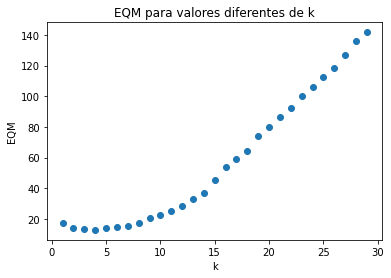

In [18]:
x = np.arange(1,30)
plt.scatter(x, scores[1:])
plt.title("EQM para valores diferentes de k")
plt.xlabel("k")
plt.ylabel("EQM")

In [19]:
#Ajustando o melhor modelo KNN#
knn_final = KNeighborsRegressor(n_neighbors=4)
knn_final.fit(X_train, y_train)
valor_predito = knn_final.predict(X_test)
eqm = mean((y_test - valor_predito)**2)

In [20]:
print(f'EQM para K=4 usando o conjunto teste: {eqm}')

EQM para K=4 usando o conjunto teste: 10.335897429045714


Text(0, 0.5, 'Valor predito')

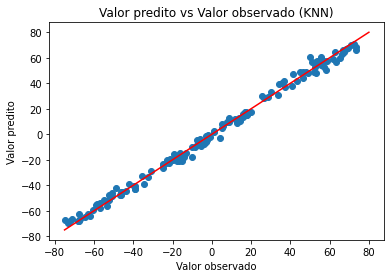

In [29]:
import matplotlib.lines as mlines
plt.scatter(y_test, valor_predito)
plt.plot([-75, 80], [-75, 80], color='red')
plt.title("Valor predito vs Valor observado (KNN)")
plt.xlabel("Valor observado")
plt.ylabel("Valor predito")

In [22]:
#Gerando lambdas num espaco exponencial#
import math
lambdas= np.logspace(0.05, 6, base= math.e)
lambdas = lambdas/2000
lambdas

array([0.00052564, 0.0005935 , 0.00067013, 0.00075664, 0.00085433,
       0.00096464, 0.00108918, 0.0012298 , 0.00138858, 0.00156786,
       0.00177028, 0.00199884, 0.00225691, 0.00254829, 0.0028773 ,
       0.00324879, 0.00366823, 0.00414183, 0.00467658, 0.00528037,
       0.00596211, 0.00673187, 0.00760101, 0.00858237, 0.00969043,
       0.01094155, 0.01235419, 0.01394923, 0.0157502 , 0.01778368,
       0.02007971, 0.02267218, 0.02559935, 0.02890445, 0.03263627,
       0.0368499 , 0.04160754, 0.04697944, 0.05304489, 0.05989345,
       0.06762621, 0.07635735, 0.08621575, 0.09734695, 0.10991529,
       0.12410631, 0.14012952, 0.15822146, 0.17864923, 0.2017144 ])

In [23]:
#Testando os lambdas por validacao cruzada em 4 blocos#
from sklearn import linear_model
media_scores_lasso = np.zeros(len(lambdas))
for i, j in enumerate(lambdas):
    lasso = linear_model.Lasso(alpha=j, max_iter=100000)
    score = cross_val_score(lasso, X_train, y_train, scoring='neg_mean_squared_error', cv=4)
    media_scores_lasso[i] = mean(score)*(-1)
    print(f'Score: {score} para lamda= {j}')

Score: [-28.69606497 -16.91591794 -14.51356982 -19.01963646] para lamda= 0.000525635548188012
Score: [-28.66221163 -16.97868478 -14.21517398 -18.54860305] para lamda= 0.0005934996770180054
Score: [-28.49331926 -17.03667774 -14.23940292 -18.5505397 ] para lamda= 0.0006701256561409067
Score: [-28.37810762 -17.06653626 -14.88565014 -19.64522668] para lamda= 0.0007566447167664709
Score: [-28.16718371 -16.96278576 -14.78093402 -19.66983414] para lamda= 0.0008543341419093968
Score: [-28.06450527 -16.568407   -14.43164674 -19.7067947 ] para lamda= 0.0009646361229498097
Score: [-28.0051017  -16.07994605 -14.08367814 -19.36522363] para lamda= 0.0010891790507399897
Score: [-27.90184181 -16.12109846 -13.92832009 -19.29325846] para lamda= 0.0012298015555784747
Score: [-27.99715226 -16.2778507  -13.90945486 -19.08243415] para lamda= 0.0013885796509542686
Score: [-28.10149292 -16.40850861 -14.045249   -18.85863157] para lamda= 0.0015678573817849112
Score: [-28.04645147 -16.41447063 -13.82867762 -18.

Text(0, 0.5, 'EQM')

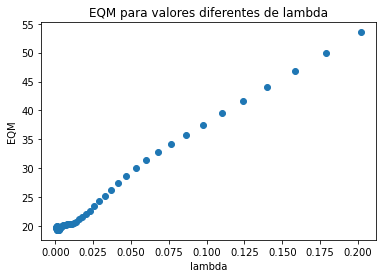

In [24]:
plt.scatter(lambdas, media_scores_lasso)
plt.title("EQM para valores diferentes de lambda")
plt.xlabel("lambda")
plt.ylabel("EQM")

In [25]:
#Selecionando o melhor lambda#
indice = np.argmin(media_scores_lasso)
melhor_lambda = lambdas[indice]
melhor_lambda

0.0017702814296091066

O melhor lambda foi 0.0017702814296091066

In [30]:
lasso_final = linear_model.Lasso(alpha=melhor_lambda, max_iter=100000)
lasso_final.fit(X_train, y_train)

Lasso(alpha=0.0017702814296091066, max_iter=100000)

In [27]:
valor_predito_lasso = lasso_final.predict(X_test)
eqm_lasso = mean((y_test - valor_predito_lasso)**2)
print(f'O EQM para para o lasso de lamda {melhor_lambda} foi {eqm_lasso}')

O EQM para para o lasso de lamda 0.0017702814296091066 foi 12.822892678738974


Text(0, 0.5, 'Valor predito')

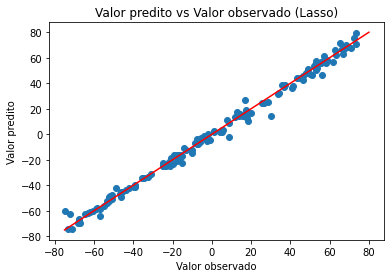

In [28]:
plt.scatter(y_test, valor_predito_lasso)
plt.plot([-75, 80], [-75, 80], color='red')
plt.title("Valor predito vs Valor observado (Lasso)")
plt.xlabel("Valor observado")
plt.ylabel("Valor predito")

In [31]:
coeficientes_melhor_lambda = lasso_final.coef_
n_zeros = np.count_nonzero(coeficientes_melhor_lambda==0)
print(f'Numero de coeficientes iguais a zero foi: {n_zeros}')

Numero de coeficientes iguais a zero foi: 3652


O modelo KNN teve resultado melhor, pois o EQM dele foi 10.34 enquanto o do Lasso foi 12.82